## Imports

In [138]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [139]:
df = []  # List avec les 4 csv files
for i in range(1, 5):
    df.append(pd.read_csv('Data/UNSW-NB15 - CSV Files/UNSW-NB15_' + str(i) + '.csv', header=None, low_memory=False))
all_df = pd.concat(df).reset_index(drop=True)

In [140]:
## Récupération des noms des colonnes
df_col = pd.read_csv('Data/UNSW-NB15 - CSV Files/NUSW-NB15_features.csv', encoding='ISO-8859-1')
# Transformation des noms de colonnes en minuscule et suppression des espaces
df_col['Name'] = df_col['Name'].apply(lambda x: x.strip().replace(' ', '').lower())
# Renommage des colonnes du dataset
all_df.columns = df_col['Name']

In [141]:
## Affichage de différentes informations sur le Dataset

In [142]:
# Displaying the shape of the dataset
print("Shape of dataset:")
print(all_df.shape)

# Display the first few rows of the DataFrame
print("\nHead of dataset:")
print(all_df.head())

# Displaying basic statistics of the DataFrame
print("\nDescriptive Statistics:")
print(all_df.describe(include='all'))

# Checking for missing values
print("\nMissing Values:")
print(all_df.isnull().sum())

Shape of dataset:
(2540047, 49)

Head of dataset:
Name       srcip  sport          dstip dsport proto state       dur  sbytes  \
0     59.166.0.0   1390  149.171.126.6     53   udp   CON  0.001055     132   
1     59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133     528   
2     59.166.0.6   1464  149.171.126.7     53   udp   CON  0.001119     146   
3     59.166.0.5   3593  149.171.126.5     53   udp   CON  0.001209     132   
4     59.166.0.3  49664  149.171.126.0     53   udp   CON  0.001169     146   

Name  dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst ct_dst_ltm  \
0        164    31  ...           0           3           7          1   
1        304    31  ...           0           2           4          2   
2        178    31  ...           0          12           8          1   
3        164    31  ...           0           6           9          1   
4        178    31  ...           0           7           9          1   

Name  ct_src_ltm  ct_src_dport

Nous allons maintenant supprimer les colonnes qui ne sont pas utiles pour notre étude.

In [143]:
## Suppression des colonnes inutiles
# srcip, sport, dstip, dsport
all_df.drop(['srcip', 'sport', 'dstip', 'dsport'], axis=1, inplace=True)

## Traitement des valeurs manquantes

Nous avons plusieurs colonnes avec des valeurs manquantes. Nous allons les traiter une par une.

In [144]:
# is_ftp_login
all_df['is_ftp_login'].value_counts()

is_ftp_login
0.0    1066593
1.0      43389
4.0        156
2.0         30
Name: count, dtype: int64

Cette colonne est normalement binaire. Elle devrait être uniquement composé de 0 et de 1. Nous allons donc remplacer toutes les valeurs supérieures à 1 par 1.

In [145]:
# Remplacement des valeurs supérieures à 1 par 1
all_df['is_ftp_login'] = all_df['is_ftp_login'].apply(lambda x: 1 if x > 1 else x)

In [146]:
# Suppression des valeurs manquantes en remplaçant par 0
all_df['is_ftp_login'].replace(' ', 0, inplace=True)  # remplacer les valeurs " " par 0

In [147]:
all_df['ct_flw_http_mthd'].value_counts()

ct_flw_http_mthd
0.0     986791
1.0     188008
6.0       7902
4.0       6564
3.0        738
2.0        588
5.0        430
9.0        270
14.0       224
12.0       132
30.0        60
8.0         56
16.0        48
36.0        36
10.0        30
25.0        25
Name: count, dtype: int64

Remplacé les valeurs manquantes par 0

In [148]:
all_df['ct_flw_http_mthd'].fillna(0, inplace=True)

Affichons les valeurs de la colonne 'attack_cat'

In [149]:
all_df['attack_cat'].value_counts()

attack_cat
Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor              1795
Reconnaissance        1759
 Shellcode            1288
Backdoors              534
Shellcode              223
Worms                  174
Name: count, dtype: int64

Nous pouvons constater que la colonne 'attack_cat' contient des doublons.
- Backdoor et Backdoors
- Reconnaissance et Reconnaissance
- Fuzzers et Fuzzers
- Shellcode et Shellcode


Nous pouvons également constater que la colonne 'attack_cat' ne contient pas de valeurs de type 'normal'. Ces valeurs sont égale à Null. Nous allons donc remplacer les valeurs Null par 'normal'.

In [150]:
all_df['attack_cat'].replace('Backdoors', 'backdoor', inplace=True)
all_df["attack_cat"] = all_df["attack_cat"].str.lower().str.strip()
all_df['attack_cat'].fillna("normal", inplace=True)

In [151]:
# Taille du dataset
print("Taille du dataset : ", all_df.shape)
print("Nom des colonnes : ", all_df.columns)
print("Nombre de valeurs nulles : ", all_df.isnull().sum().sum())
all_df.select_dtypes(include=['object']).columns # Vérification des types de données


Taille du dataset :  (2540047, 45)
Nom des colonnes :  Index(['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt',
       'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label'],
      dtype='object', name='Name')
Nombre de valeurs nulles :  1429879


Index(['proto', 'state', 'service', 'ct_ftp_cmd', 'attack_cat'], dtype='object', name='Name')

Le type object est égale à des variables catégorique. Le problème c'est que "ct_ftp_cmd" est une valeur numérique.

In [152]:
all_df['ct_ftp_cmd'].value_counts()

ct_ftp_cmd
     1429879
0     686192
0     380306
1      29605
1      10472
2       1168
4        800
3        729
6        332
5        290
4        160
2         96
8         18
Name: count, dtype: int64

In [153]:
# transformation des valeur " " en 0
all_df['ct_ftp_cmd'].replace(' ', 0, inplace=True)  # remplacer les valeurs " " par 0
# transformations des valeurs en valeurs numérique afin de fusionner les 0 et les 1
all_df['ct_ftp_cmd'] = pd.to_numeric(all_df['ct_ftp_cmd'], errors='coerce')  # convertir les données en numérique
all_df['ct_ftp_cmd'].value_counts()

ct_ftp_cmd
0    2496377
1      40077
2       1264
4        960
3        729
6        332
5        290
8         18
Name: count, dtype: int64

## Afficher la répartition des valeurs de la colonne 'attack_cat'

attack_cat
normal            2218764
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             2329
shellcode            1511
worms                 174
Name: count, dtype: int64

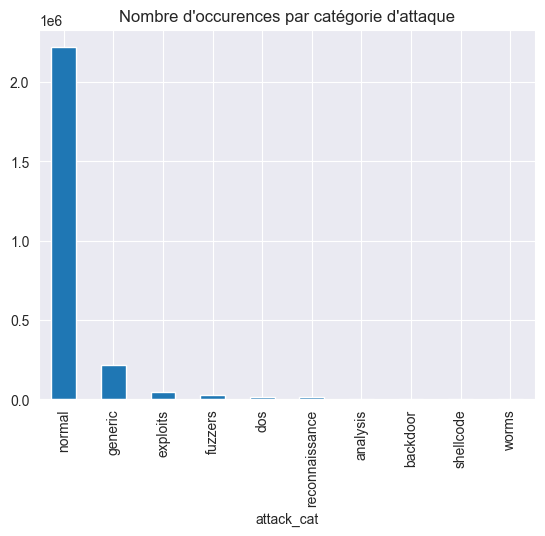

In [154]:
# Visualisation des données
display(all_df['attack_cat'].value_counts())
data_plot = all_df['attack_cat'].value_counts().plot(kind='bar', title="Nombre d'occurences par catégorie d'attaque")

### Suppression de certaines lignes de catégorie d'attaque normal
Nous allons supprimer certaines lignes des catégories d'attaques normales, car elles sont beaucoup trop présente dans le jeu de donnée. Ce qui permettra d'avoir un jeu de donnée plus équilibré

attack_cat
generic           215481
normal            143654
exploits           44525
fuzzers            24246
dos                16353
reconnaissance     13987
analysis            2677
backdoor            2329
shellcode           1511
worms                174
Name: count, dtype: int64

<Axes: title={'center': "Nombre d'occurences par catégorie d'attaque"}, xlabel='attack_cat'>

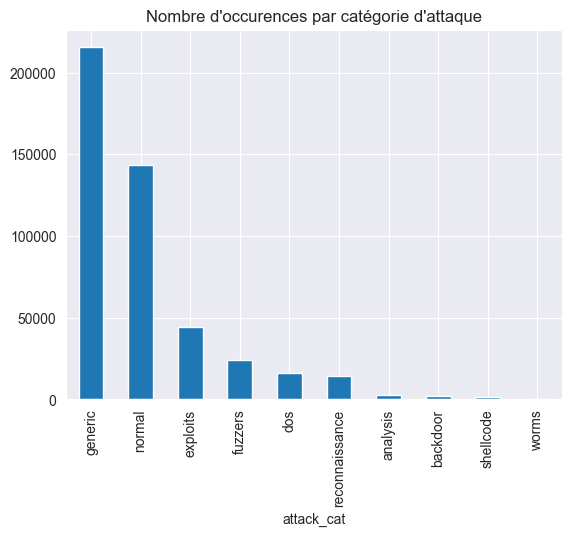

In [155]:
# suppression de 500 lignes de la catégorie normal
nb_generic_attack = int(all_df[all_df['attack_cat'] == 'generic'].shape[0])
nb_normal_attack = int(all_df[all_df['attack_cat'] == 'normal'].shape[0])
rows_to_drop_count = int(nb_normal_attack - (nb_generic_attack * 2 / 3))
rows_to_drop = all_df[all_df['attack_cat'] == 'normal'].head(rows_to_drop_count).index
all_df.drop(rows_to_drop, inplace=True)

# Visualisation des données
display(all_df['attack_cat'].value_counts())
all_df['attack_cat'].value_counts().plot(kind='bar', title="Nombre d'occurences par catégorie d'attaque")

## Encodage des variables catégorielles

In [156]:
# Transformations des valeurs catégorielles en valeurs numériques
def encode_string_byte(df, col_name):
    encoder = LabelEncoder()  # Outils pour encoder les valeurs catégorielles
    # fit → permet d'apprendre les différentes valeurs possibles
    # transform → permet de remplacer les valeurs par les valeurs numériques
    df[col_name] = encoder.fit_transform(df[col_name])


In [157]:
# 3 colonnes catégorielles contenant des valeurs textuelles
encode_string_byte(all_df, 'proto')
encode_string_byte(all_df, 'state')
encode_string_byte(all_df, 'service')

print("Colonne 'Proto' --> Valeur max : {} Valeur min : {}".format(max(all_df['proto']), min(all_df['proto'])))
print("Colonne 'State' --> Valeur max : {} Valeur min : {}".format(max(all_df['state']), min(all_df['state'])))
print("Colonne 'Service' --> Valeur max : {} Valeur min : {}".format(max(all_df['service']), min(all_df['service'])))


Colonne 'Proto' --> Valeur max : 132 Valeur min : 0
Colonne 'State' --> Valeur max : 13 Valeur min : 0
Colonne 'Service' --> Valeur max : 12 Valeur min : 0


In [158]:
def find_empty_string(df):
    for col in df.columns:
        if df[col].dtype == 'O':  # 'O' signifie object, donc nous vérifions les colonnes de type string
            empty_string_rows = df[df[col] == ' ']
            if not empty_string_rows.empty:
                return col, empty_string_rows.index
    return None, None

col_with_issue, row_indices_with_issue = find_empty_string(all_df)
if col_with_issue:
    print(f"La colonne '{col_with_issue}' contient des chaînes vides aux indices {row_indices_with_issue}.")
else:
    print("Aucune chaîne vide trouvée.")

find_empty_string(all_df)

Aucune chaîne vide trouvée.


(None, None)

In [159]:
# Transformation de toutes les colonnes en float excepté la colonne 'attack_cat'
for col in all_df.columns:
    if col != 'attack_cat':
        all_df[col] = all_df[col].astype(float)

## Normalisation des données
Certaines données ont des valeurs très élevées comme la colonne 'sbytes' qui a une valeur max de 14'355'774. Nous allons donc normaliser les données. On va mettre les données à l'échelle entre 0 et 1.

In [160]:
# Normalisation des données
# Permet de ramener les valeurs entre 0 et 1, pour éviter que certaines valeurs aient plus d'importance que d'autres
def normalize(df, col_name):
    x = df[col_name].values.astype(float)  # On récupère les valeurs de la colonne, et on les convertit en float
    min_max_scaler = preprocessing.MinMaxScaler()  # Outils pour normaliser les valeurs
    x_scaled = min_max_scaler.fit_transform(x.reshape(-1, 1))  # On normalise les valeurs
    # x.reshape(-1, 1) permet de convertir un vecteur en matrice
    df[col_name] = x_scaled

In [161]:
all_df

Name,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
20,119.0,6.0,0.000021,728.0,0.0,254.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,exploits,1.0
21,113.0,5.0,0.240139,918.0,25552.0,62.0,252.0,2.0,10.0,5.0,...,0.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,exploits,1.0
22,113.0,5.0,2.390390,1362.0,268.0,254.0,252.0,6.0,1.0,5.0,...,0.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,reconnaissance,1.0
39,113.0,5.0,0.175190,8168.0,268.0,254.0,252.0,4.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,exploits,1.0
40,113.0,5.0,0.190600,844.0,268.0,254.0,252.0,2.0,1.0,5.0,...,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,exploits,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,113.0,5.0,0.087306,320.0,1828.0,31.0,29.0,1.0,2.0,4.0,...,0.0,1.0,2.0,3.0,3.0,1.0,1.0,3.0,normal,0.0
2540043,113.0,2.0,0.365058,456.0,346.0,31.0,29.0,2.0,2.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,normal,0.0
2540044,113.0,2.0,6.335154,1802.0,2088.0,31.0,29.0,7.0,9.0,3.0,...,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,normal,0.0
2540045,113.0,2.0,2.200934,3498.0,166054.0,31.0,29.0,2.0,57.0,5.0,...,0.0,1.0,1.0,2.0,4.0,2.0,2.0,2.0,normal,0.0


In [162]:
# Normalisation des données excepté les colonnes catégorielles
normalize(all_df, 'dur')
normalize(all_df, 'sbytes')
normalize(all_df, 'dbytes')
normalize(all_df, 'sttl')
normalize(all_df, 'dttl')
normalize(all_df, 'sloss')
normalize(all_df, 'dloss')
normalize(all_df, 'sload')
normalize(all_df, 'dload')
normalize(all_df, 'spkts')
normalize(all_df, 'dpkts')
normalize(all_df, 'swin')
normalize(all_df, 'dwin')
normalize(all_df, 'stcpb')
normalize(all_df, 'dtcpb')
normalize(all_df, 'smeansz')
normalize(all_df, 'dmeansz')
normalize(all_df, 'trans_depth')
normalize(all_df, 'res_bdy_len')
normalize(all_df, 'sjit')
normalize(all_df, 'djit')
normalize(all_df, 'stime')
normalize(all_df, 'ltime')
normalize(all_df, 'sintpkt')
normalize(all_df, 'dintpkt')
normalize(all_df, 'tcprtt')
normalize(all_df, 'synack')
normalize(all_df, 'ackdat')
normalize(all_df, 'is_sm_ips_ports')
normalize(all_df, 'ct_state_ttl')
normalize(all_df, 'ct_flw_http_mthd')
normalize(all_df, 'is_ftp_login')
normalize(all_df, 'ct_ftp_cmd')
normalize(all_df, 'ct_srv_src')
normalize(all_df, 'ct_srv_dst')
normalize(all_df, 'ct_dst_ltm')
normalize(all_df, 'ct_src_ltm')
normalize(all_df, 'ct_src_dport_ltm')
normalize(all_df, 'ct_dst_sport_ltm')
normalize(all_df, 'ct_dst_src_ltm')
normalize(all_df, 'is_sm_ips_ports')

## Quantification
Après la normalisation, une quantification est utilisée pour ramener les valeurs entre 0 et 255. Cela permet de réduire la taille des données. Ce sera utile car nous allons "fabriquer" des images à partir de ces données. Ainsi chaque pixel d'une image est représenté en nuance de noir 0 (noir) et 255 (blanc). Ainsi, les données seront prête à traitées par un réseau de neurones convolutif.

In [163]:
def quantification_0_255(df, col_name):
    x = df[col_name].values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler((0, 255))
    x_0_255 = min_max_scaler.fit_transform(x.reshape(-1, 1)).astype(int)
    df[col_name] = x_0_255

In [164]:
# Normalisation des données excepté les colonnes catégorielles
quantification_0_255(all_df, 'dur')
quantification_0_255(all_df, 'sbytes')
quantification_0_255(all_df, 'dbytes')
quantification_0_255(all_df, 'sttl')
quantification_0_255(all_df, 'dttl')
quantification_0_255(all_df, 'sloss')
quantification_0_255(all_df, 'dloss')
quantification_0_255(all_df, 'sload')
quantification_0_255(all_df, 'dload')
quantification_0_255(all_df, 'spkts')
quantification_0_255(all_df, 'dpkts')
quantification_0_255(all_df, 'swin')
quantification_0_255(all_df, 'dwin')
quantification_0_255(all_df, 'stcpb')
quantification_0_255(all_df, 'dtcpb')
quantification_0_255(all_df, 'smeansz')
quantification_0_255(all_df, 'dmeansz')
quantification_0_255(all_df, 'trans_depth')
quantification_0_255(all_df, 'res_bdy_len')
quantification_0_255(all_df, 'sjit')
quantification_0_255(all_df, 'djit')
quantification_0_255(all_df, 'stime')
quantification_0_255(all_df, 'ltime')
quantification_0_255(all_df, 'sintpkt')
quantification_0_255(all_df, 'dintpkt')
quantification_0_255(all_df, 'tcprtt')
quantification_0_255(all_df, 'synack')
quantification_0_255(all_df, 'ackdat')
quantification_0_255(all_df, 'is_sm_ips_ports')
quantification_0_255(all_df, 'ct_state_ttl')
quantification_0_255(all_df, 'ct_flw_http_mthd')
quantification_0_255(all_df, 'is_ftp_login')
quantification_0_255(all_df, 'ct_ftp_cmd')
quantification_0_255(all_df, 'ct_srv_src')
quantification_0_255(all_df, 'ct_srv_dst')
quantification_0_255(all_df, 'ct_dst_ltm')
quantification_0_255(all_df, 'ct_src_ltm')
quantification_0_255(all_df, 'ct_src_dport_ltm')
quantification_0_255(all_df, 'ct_dst_sport_ltm')
quantification_0_255(all_df, 'ct_dst_src_ltm')
quantification_0_255(all_df, 'is_sm_ips_ports')

/var/folders/r8/yp7fppw121z87d8zsbh06g0h0000gn/T/ipykernel_63253/2702598143.py:4: RuntimeWarning: invalid value encountered in cast
  x_0_255 = min_max_scaler.fit_transform(x.reshape(-1, 1)).astype(int)


## Transformation de la colonne "attack_cat" en effectuant un OneHotEncoding

In [165]:
# Effectue l'encodage one-hot sur la colonne 'attack_cat'
dummies = pd.get_dummies(all_df['attack_cat'], prefix='attack_cat')

# Ajoute les colonnes d'encodage one-hot au dataframe
all_df = pd.concat([all_df, dummies], axis=1)

# Supprime la colonne originale 'attack_cat'
all_df.drop('attack_cat', axis=1, inplace=True)

In [166]:
## Fin de la préparation des données, on affiche le résultat

In [167]:
display(all_df)

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,attack_cat_analysis,attack_cat_backdoor,attack_cat_dos,attack_cat_exploits,attack_cat_fuzzers,attack_cat_generic,attack_cat_normal,attack_cat_reconnaissance,attack_cat_shellcode,attack_cat_worms
20,119.0,6.0,0,0,0,254,0,0,0,0.0,...,False,False,False,True,False,False,False,False,False,False
21,113.0,5.0,1,0,0,62,252,0,0,5.0,...,False,False,False,True,False,False,False,False,False,False
22,113.0,5.0,10,0,0,254,252,0,0,5.0,...,False,False,False,False,False,False,False,True,False,False
39,113.0,5.0,0,0,0,254,252,0,0,0.0,...,False,False,False,True,False,False,False,False,False,False
40,113.0,5.0,0,0,0,254,252,0,0,5.0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,113.0,5.0,0,0,0,31,29,0,0,4.0,...,False,False,False,False,False,False,True,False,False,False
2540043,113.0,2.0,1,0,0,31,29,0,0,3.0,...,False,False,False,False,False,False,True,False,False,False
2540044,113.0,2.0,26,0,0,31,29,0,0,3.0,...,False,False,False,False,False,False,True,False,False,False
2540045,113.0,2.0,9,0,2,31,29,0,2,5.0,...,False,False,False,False,False,False,True,False,False,False


## Sauvegarde des données dans un fichier CSV

In [168]:
all_df.to_csv('all_data_UNSW-NB15.csv', index=False)

In [169]:
all_df.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,attack_cat_analysis,attack_cat_backdoor,attack_cat_dos,attack_cat_exploits,attack_cat_fuzzers,attack_cat_generic,attack_cat_normal,attack_cat_reconnaissance,attack_cat_shellcode,attack_cat_worms
20,119.0,6.0,0,0,0,254,0,0,0,0.0,...,False,False,False,True,False,False,False,False,False,False
21,113.0,5.0,1,0,0,62,252,0,0,5.0,...,False,False,False,True,False,False,False,False,False,False
22,113.0,5.0,10,0,0,254,252,0,0,5.0,...,False,False,False,False,False,False,False,True,False,False
39,113.0,5.0,0,0,0,254,252,0,0,0.0,...,False,False,False,True,False,False,False,False,False,False
40,113.0,5.0,0,0,0,254,252,0,0,5.0,...,False,False,False,True,False,False,False,False,False,False
